<a href="https://colab.research.google.com/github/phoumithona/matrix_computation/blob/master/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

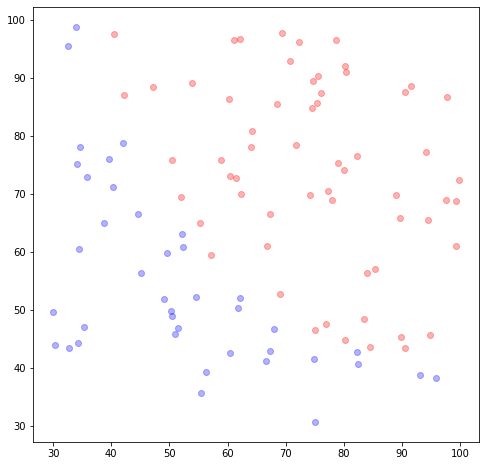

In [664]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

In [665]:
# initial value for theta_0,1,2,3
theta_0 = np.random.normal(0,1)   
theta_1 = np.random.normal(0,1)
theta_2 = np.random.normal(0,1)

alpha = 0.0005       # learning rate
iterations = 1000    # number of iterations
m = len(x)           # number of features

j      = []
theta0 = []
theta1 = []
theta2 = []

# loop for updating with iterations
for i in range (iterations):
    z  = theta_0 + theta_1 * x + theta_2 * y  #logistic regression equation
    h  = 1/(1 + np.exp(-z))                   #sigmoid function
    dh = h *(1-h)                             #derivative of h
    
    #cost function
    cost = (1/m)*(sum(-label*np.log10(h)-(1-label)*np.log10(1-h)))
    j.append(cost)
               
    theta_0 = theta_0 - (alpha/m)*(sum(h -label))
    theta0.append(theta_0)
    theta_1 = theta_1 - (alpha/m)*(sum((h - label)*x))
    theta1.append(theta_1)
    theta_2 = theta_2 - (alpha/m)*(sum((h - label)*y))
    theta2.append(theta_2)
    
# printing the final theta values             
print('Theta_0 = ',theta_0)
print('Theta_1 = ',theta_1)
print('Theta_2 = ',theta_2)

Theta_0 =  -1.3277702263648092
Theta_1 =  0.019743261954783042
Theta_2 =  0.010812833974472455


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply


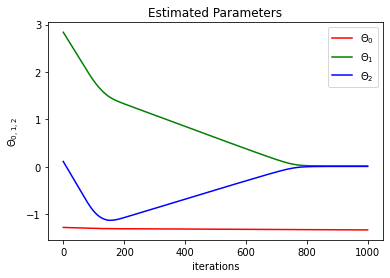

In [666]:
# Plot the estimated parameters
plt.plot(theta0,'r')
plt.plot(theta1,'g')
plt.plot(theta2,'b')
plt.xlabel('iterations')
plt.ylabel('$\Theta_{0,1,2}$')
plt.legend(['$ \Theta_0 $','$ \Theta_1 $','$ \Theta_2 $'])
plt.title('Estimated Parameters')
plt.show()

Training Error =  0.236547971332556


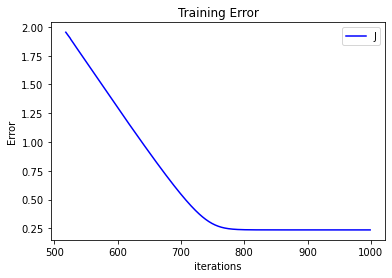

In [667]:
# Plot the training error
plt.plot(j,'b')
print('Training Error = ', j[len(j)-1])
plt.xlabel('iterations')
plt.ylabel('Error')
plt.legend(('J'))
plt.title('Training Error')
plt.show() # plot error for training data

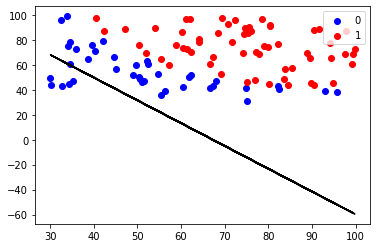

In [668]:
# draw the separator line
yy = -(np.array(x) * theta_1 + theta_0)/(theta_2)

# plot labeled data and separator line 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_label0,y_label0, c='b', label='0')
ax.scatter(x_label1,y_label1, c='r', label='1')
ax.plot(x,yy, c='k')
plt.legend(loc='upper right');
plt.show()